In [ ]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 37.0 MB/s eta 0:00:00


In [ ]:
import rasterio as rio
from rasterio.plot import show
from sklearn import cluster
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mc

In [ ]:
#Open image file using raster.rio.open()
cuprite = rio.open('https://github.com/skerryvore/multispectral_image_analysis/blob/main/images/clip_cuprite_vnir_swir_b123456789_wgs84_utm11_15m.tif?raw=true')
print (cuprite.meta)

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 1018, 'height': 933, 'count': 9, 'crs': CRS.from_epsg(32611), 'transform': Affine(15.0, 0.0, 478047.2851,
       0.0, -15.0, 4158586.613)}


31.0 87.0


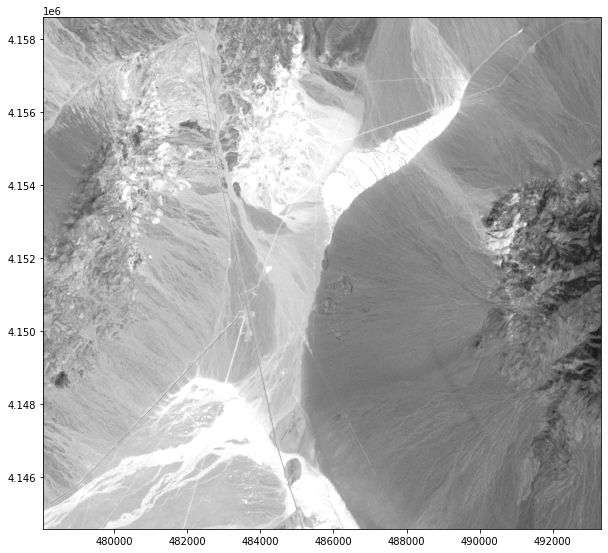

In [ ]:
# Read and enhance and show the raw image

cuprite_img = cuprite.read() # read the opened raw image data
vmin, vmax = np.nanpercentile(cuprite_img,(0,50)) #set min-max percentile contrast stretch
print(vmin,vmax)


# show enhanced image

plt.figure(figsize=[10,10])
show((cuprite, 1),cmap="Greys_r", vmin=vmin, vmax=vmax)
#show(cuprite)

plt.show()

In [ ]:
print(cuprite.count)

9


(933, 1018, 3)
(933, 1018, 3)


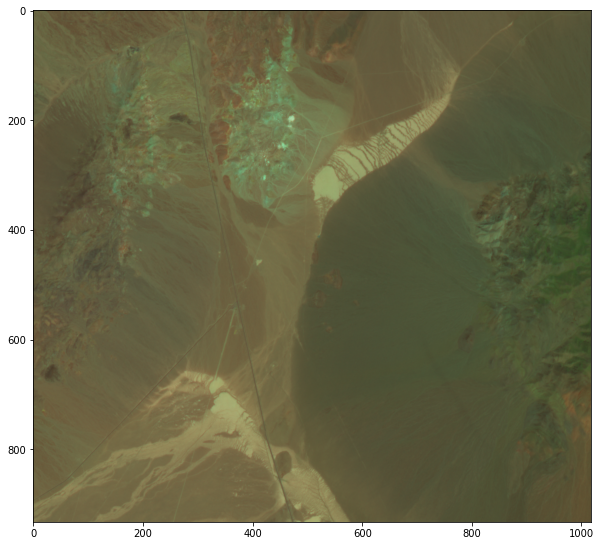

In [ ]:
# create an 3D numpy array to hold three data for bands to plot an RGB image

cuprite_rgb = np.empty((cuprite.height,cuprite.width,3), cuprite.meta['dtype'])
print(cuprite_rgb.shape)

# loop over raster bands and read in the data for bands list in order r,g,b

bands =[8,3,1] #list of bands to use for pseudocolor rgb image

for i,band in enumerate(bands):
  cuprite_rgb[:,:,i] = cuprite.read(band)

print(cuprite_rgb.shape)

plt.figure(figsize=[10,10])
plt.imshow(cuprite_rgb)


In [ ]:
# create an empty numpy array to hold the image data

cuprite_xyb = np.empty((cuprite.height,cuprite.width,cuprite.count), cuprite.meta['dtype'])

# loop over raster bands and read in the data to fill the empty array

for band in range(cuprite_xyb.shape[2]):
  cuprite_xyb[:,:,band] = cuprite.read(band+1)

print(cuprite_xyb.shape)

(933, 1018, 9)


In [ ]:
# convert 3D array into 2D array, i.e. flatten each band into a 1D array

cuprite_data = cuprite_xyb[:,:,:14].reshape((cuprite_xyb.shape[0]*cuprite_xyb.shape[1],cuprite_xyb.shape[2]))

print(cuprite_data.shape)

(949794, 9)


In [ ]:
# setup and train the K-means classifier

cl = cluster.KMeans(n_clusters=8) #create an object classifier and set number of clusters
param = cl.fit(cuprite_data) # train the classifier

cuprite_cl = cl.labels_ # get the labels of the classes
cuprite_cl = cuprite_cl.reshape(cuprite_xyb[:,:,0].shape) # reshape array so we can plot the image, as single band array

print(cuprite_cl.shape)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(933, 1018)


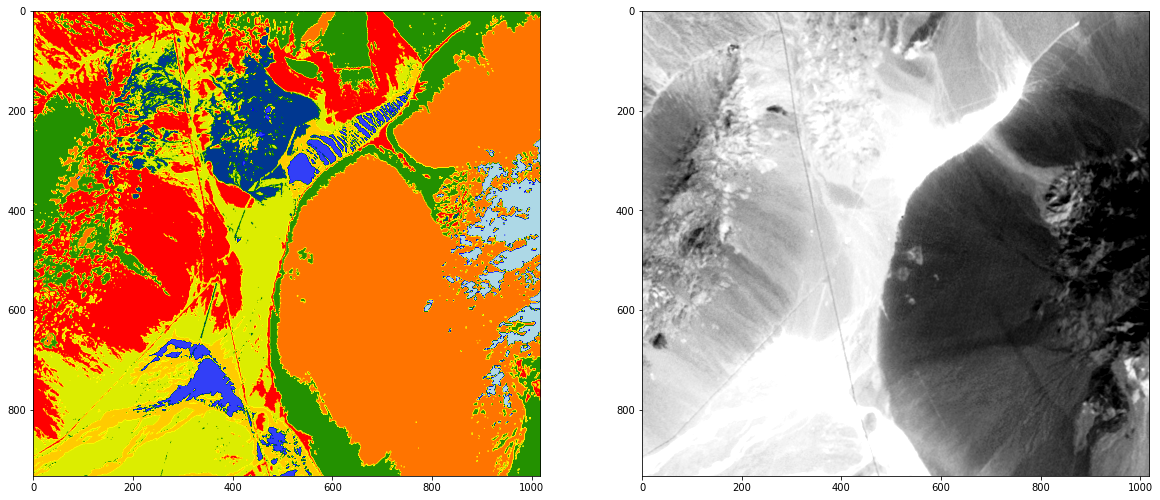

In [ ]:
# Plot the classified image using specified colour map

cmap = mc.LinearSegmentedColormap.from_list("",["red","orange","yellow","green","blue","lightblue"])

# show classified image and RGB image

fig,(ax1,ax2) = plt.subplots(1,2,figsize=[20,10])
ax1.imshow(cuprite_cl,cmap=cmap)

#ax2.imshow(cuprite_rgb) # plot RGB image
ax2.imshow(cuprite_rgb[:,:,0],cmap='Greys_r',vmin=70, vmax=120) # plot single band greyscale image

plt.show()


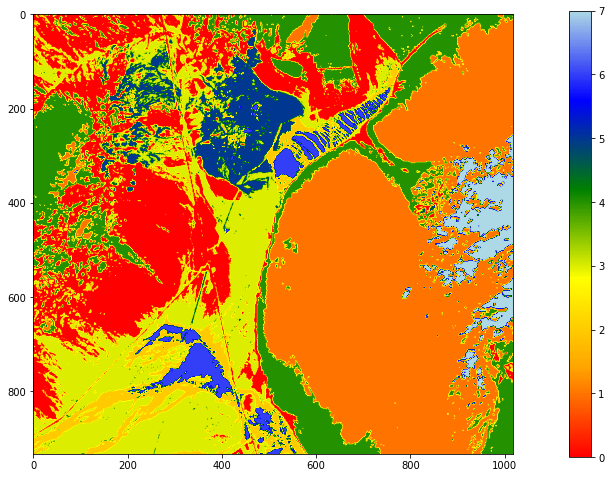

In [ ]:


plt.figure(figsize=[10,10])
plt.imshow(cuprite_cl,cmap=cmap)
#plt.colorbar()
plt.colorbar(fraction=0.04, pad=0.1)
#plt.axis('off')
plt.show()

